# Basics of cluster analysis

In this notebook we explore the very basics of cluster analysis with k-means

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [2]:
# Load the country clusters data
data = pd.read_csv('3.01. Country clusters.csv')

Latitude and Longitude correspond to the geographic centers of the countries.

Convert the degrees, minutes, seconds (DMS) coordinates values to convert to decimal degrees (dd).

In [3]:
# Check out the data manually 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

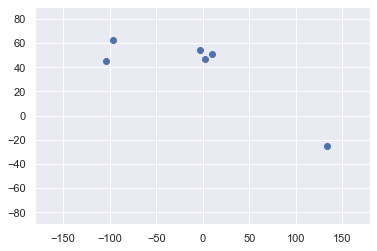

In [4]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

DataFrame.iloc(row indices, column indices) : slices the data frame, given rows and columns to be kept.

iloc is a method used to 'slice' data. 'slice' is not technically correct as there are methods 'slice' which are a bit different. The term used by pandas is 'selection by position'.

The first argument of identifies the rows we want to keep. The second - the columns. When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded.

In [5]:
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [6]:
# Check if we worked correctly
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

This is the part of the sheet which deals with the actual clustering

In [7]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [8]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

There are many ways to do this part, we found this to be the most illustrative one

sklearn.cluster.KMeans.fit_predict(x) : returns the cluster predictions in an array.

In [9]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [10]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


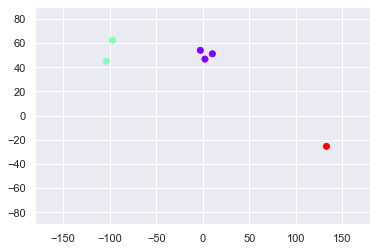

In [11]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map the data

In [12]:
# Create a copy of the original dataset
data_mapped = data.copy()
# Map languages with 0, 1, and 2. Note that this is not the best way to do that, but for now we will use it 
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# Check if we did it correctly
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [14]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded

x = data_mapped.iloc[:,1:4]

# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0
# Check if we worked correctly
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [22]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [23]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=3)

## Clustering results

In [24]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [25]:
# Create a copy of the mapped data
data_with_clusters = data_mapped.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


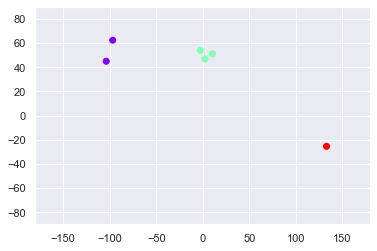

In [26]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

In [27]:
# Get the WCSS for the current solution
kmeans.inertia_

290.10523333333333

In [31]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    # list.append(x) : appends a new item with value x to the end of the object (list,array,etc)
    wcss.append(wcss_iter)

In [29]:
# Let's see what we got
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

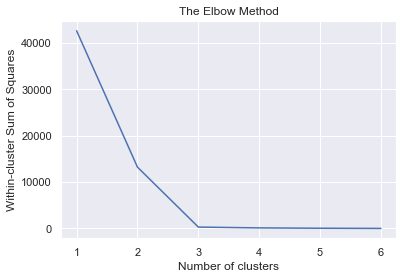

In [30]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')